In [39]:
import pandas as pd 

df = pd.read_csv('/project/c_gnn_001/code/tsp/atsp_gnn/jobs/best_final_output_table.csv')
df2 = pd.read_csv('/project/c_gnn_001/code/tsp/atsp_gnn/jobs/all_final_output_table.csv')
df = df.drop('model_file', axis=1)
df3 = df2.copy()
desired_cols = [
    'atsp_size',
    'relations',
    'agg',
    'Avg Gap GNN (%)',
    'Avg Gap 2-Opt (%)',
    'Avg Gap 3-Opt (%)',
    'iterations',
    'GNN Time (s)',
    'Edge Builder + 2-Opt Time (s)',
    'Edge Builder + 3-Opt Time (s)',
    'Total Time 2-Opt (s)',
    'Total Time 3-Opt (s)',
    'Avg Opt Cost (M)',
]

missing = [c for c in desired_cols if c not in df2.columns]
if missing:
    raise ValueError(f"Missing columns in df2: {missing}")

df2 = df2[desired_cols]
df2[df2.select_dtypes(include='float').columns] = df2.select_dtypes(include='float').round(2)

priority = [
    'atsp_size', 'relations', 'agg',
    'Avg Gap GNN (%)', 'Avg Gap 2-Opt (%)', 'Avg Gap 3-Opt (%)'
]

ordered = [c for c in priority if c in df.columns] + [c for c in df.columns if c not in priority]
df = df[ordered]
print(df.columns)
ordered = [c for c in priority if c in df2.columns] + [c for c in df2.columns if c not in priority]
df2 = df2[ordered]
print(df2.columns)
print(df[df['GNN Time (s)'] == 0.0].sum(numeric_only=True))
print(df2[df2['GNN Time (s)'] == 0.0].sum(numeric_only=True))


Index(['atsp_size', 'relations', 'agg', 'Avg Gap GNN (%)', 'Avg Gap 2-Opt (%)',
       'Avg Gap 3-Opt (%)', 'iterations', 'GNN Time (s)',
       'Edge Builder + 2-Opt Time (s)', 'Edge Builder + 3-Opt Time (s)',
       'Total Time 2-Opt (s)', 'Total Time 3-Opt (s)', 'Avg Opt Cost (M)'],
      dtype='object')
Index(['atsp_size', 'relations', 'agg', 'Avg Gap GNN (%)', 'Avg Gap 2-Opt (%)',
       'Avg Gap 3-Opt (%)', 'iterations', 'GNN Time (s)',
       'Edge Builder + 2-Opt Time (s)', 'Edge Builder + 3-Opt Time (s)',
       'Total Time 2-Opt (s)', 'Total Time 3-Opt (s)', 'Avg Opt Cost (M)'],
      dtype='object')
atsp_size                        0.0
Avg Gap GNN (%)                  0.0
Avg Gap 2-Opt (%)                0.0
Avg Gap 3-Opt (%)                0.0
iterations                       0.0
GNN Time (s)                     0.0
Edge Builder + 2-Opt Time (s)    0.0
Edge Builder + 3-Opt Time (s)    0.0
Total Time 2-Opt (s)             0.0
Total Time 3-Opt (s)             0.0
Avg Opt Cost

In [3]:
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 20)

# Find top 3 best for each group
top_3_per_group = (df.sort_values(['atsp_size', 'Avg Gap 3-Opt (%)'])
                   .groupby('atsp_size', group_keys=False)
                   .head(3)
                   .reset_index(drop=True))

print(top_3_per_group.to_string(index=False))


 atsp_size   relations    agg  Avg Gap GNN (%)  Avg Gap 2-Opt (%)  Avg Gap 3-Opt (%)  iterations  GNN Time (s)  Edge Builder + 2-Opt Time (s)  Edge Builder + 3-Opt Time (s)  Total Time 2-Opt (s)  Total Time 3-Opt (s)  Avg Opt Cost (M)
       100       ss_tt concat            13.27               9.97               2.31           9          0.39                           2.70                           5.18                  3.09                  5.57               0.0
       100    pp_ss_tt    sum            13.70              10.14               2.43           9          0.44                           2.63                           5.52                  3.07                  5.96               0.0
       100 pp_ss_st_tt concat            12.84               9.39               2.46           9          0.65                           2.67                           5.26                  3.32                  5.91               0.0
       150 pp_ss_st_tt   attn            15.30              

In [4]:
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 20)

# Find top 3 best for each group
top_3_per_group = (df2.sort_values(['atsp_size', 'Avg Gap 3-Opt (%)'])
                   .groupby('atsp_size', group_keys=False)
                   .head(3)
                   .reset_index(drop=True))

print(top_3_per_group.to_string(index=False))
print(top_3_per_group.value_counts(['relations', 'agg']).sort_values(ascending=False).head(1))



 atsp_size   relations    agg  Avg Gap GNN (%)  Avg Gap 2-Opt (%)  Avg Gap 3-Opt (%)  iterations  GNN Time (s)  Edge Builder + 2-Opt Time (s)  Edge Builder + 3-Opt Time (s)  Total Time 2-Opt (s)  Total Time 3-Opt (s)  Avg Opt Cost (M)
       100       ss_tt concat            13.27               9.97               2.31           9          0.39                           2.70                           5.18                  3.09                  5.57              1.56
       100    pp_ss_tt    sum            13.70              10.14               2.43           9          0.44                           2.63                           5.52                  3.07                  5.96              1.56
       100       ss_tt concat            13.27               9.97               2.44           6          0.39                           2.70                           3.56                  3.09                  3.96              1.56
       150 pp_ss_st_tt   attn            15.30              

In [5]:
time_caps = {100: 3.23, 150: 4.24, 250: 8.48, 500: 17.06}

eligible = df2[
    df2['Total Time 3-Opt (s)'] <= df2['atsp_size'].map(time_caps).fillna(float('inf'))
]

top3 = (
    eligible.sort_values(['atsp_size', 'Avg Gap 3-Opt (%)'])
            .groupby('atsp_size', group_keys=False)
            .head(3)
)

print(top3.to_string(index=False))
print(top3.value_counts(['relations', 'agg']).sort_values(ascending=False).head(1))



 atsp_size   relations    agg  Avg Gap GNN (%)  Avg Gap 2-Opt (%)  Avg Gap 3-Opt (%)  iterations  GNN Time (s)  Edge Builder + 2-Opt Time (s)  Edge Builder + 3-Opt Time (s)  Total Time 2-Opt (s)  Total Time 3-Opt (s)  Avg Opt Cost (M)
       100 pp_ss_st_tt concat            12.84               9.39               2.84           3          0.65                           2.67                           1.70                  3.32                  2.35              1.56
       100       ss_tt concat            13.27               9.97               2.87           3          0.39                           2.70                           1.73                  3.09                  2.12              1.56
       100    pp_ss_tt    sum            13.70              10.14               2.90           3          0.44                           2.63                           1.84                  3.07                  2.28              1.56
       150 pp_ss_st_tt   attn            15.30              

In [6]:
subset = df2[
    (df2['relations'] == 'pp_ss_st_tt') &
    (df2['atsp_size'] == 100) &
    (df2['agg'].isin(['concat', 'attn']))
]

idx = subset.groupby('agg')['Avg Gap 3-Opt (%)'].idxmin()
print("row indices in df2:", idx.tolist())

print(df3.loc[idx].to_string(index=True))


row indices in df2: [36, 40]
    atsp_size    relations     agg  Avg Gap GNN (%)  Avg Gap 2-Opt (%)  Avg Gap 3-Opt (%)  iterations                            model_file  slurm_dir framework     model  GNN Time (s)  Edge Builder + 2-Opt Time (s)  Edge Builder + 3-Opt Time (s)  Total Time 2-Opt (s)  Total Time 3-Opt (s)  combined_total_time_s  Avg Opt Cost (M)  model_param_count  hidden_dim  num_heads  num_gnn_layers    three_opt_source
36        100  pp_ss_st_tt    attn        16.073753          10.861721              3.058           9    best_model_rel_pp_ss_st_tt_attn.pt   12201357       dgl  HetroGAT          0.58                       2.651514                          5.829              3.231514                 6.409                  5.829          1.561316               5225          16          2               3  slurm-12237679.out
40        100  pp_ss_st_tt  concat        12.838508           9.393829              2.457           9  best_model_rel_pp_ss_st_tt_concat.pt   12201358 

In [14]:
relation_filter = "pp_ss_st_tt"
agg_filter = "attn"
df = df2
filtered = df[
    (df["relations"] == relation_filter) &
    (df["agg"] == agg_filter)
].sort_values(["atsp_size", "iterations"])

pretty_all = (
    filtered
    .rename(columns={
        "atsp_size": "ATSP",
        "relations": "rel",
        "agg": "agg",
        "iterations": "iter",  # Rename here for display
        "Avg Gap GNN (%)": "GNN gap (%)",
        "Avg Gap 2-Opt (%)": "2-Opt gap (%)",
        "Avg Gap 3-Opt (%)": "3-Opt gap (%)"
    })
    .assign(**{
        "3-Opt time (s)": filtered.apply(
            lambda r: f"{r['Total Time 3-Opt (s)']:.2f} ({r['Edge Builder + 3-Opt Time (s)']:.2f})",
            axis=1,
        ),
        "2-Opt time (s)": filtered.apply(
            lambda r: f"{r['Total Time 2-Opt (s)']:.2f} ({r['Edge Builder + 2-Opt Time (s)']:.2f})",
            axis=1,
        ),
    })
    .loc[:, [
        "ATSP", "rel", "agg", "iter",  # Use "iter" here after renaming
        "GNN gap (%)", "2-Opt gap (%)", "3-Opt gap (%)",
        "3-Opt time (s)", "2-Opt time (s)",
    ]]
)

print("All configs for agg='attn' and relations='pp_ss_st_tt':")
display(pretty_all)

All configs for agg='attn' and relations='pp_ss_st_tt':


,ATSP,rel,agg,iter,GNN gap (%),2-Opt gap (%),3-Opt gap (%),3-Opt time (s),2-Opt time (s)
39,100,pp_ss_st_tt,attn,0,16.07,10.86,8.25,0.58 (0.00),3.23 (2.65)
38,100,pp_ss_st_tt,attn,3,16.07,10.86,3.45,2.52 (1.94),3.23 (2.65)
37,100,pp_ss_st_tt,attn,6,16.07,10.86,3.14,4.46 (3.88),3.23 (2.65)
36,100,pp_ss_st_tt,attn,9,16.07,10.86,3.06,6.41 (5.83),3.23 (2.65)
213,150,pp_ss_st_tt,attn,0,15.30,12.08,8.49,0.86 (0.03),4.66 (3.83)
212,150,pp_ss_st_tt,attn,1,15.30,12.08,4.76,3.11 (2.28),4.66 (3.83)
211,150,pp_ss_st_tt,attn,2,15.30,12.08,3.82,5.42 (4.58),4.66 (3.83)
341,250,pp_ss_st_tt,attn,0,16.04,14.29,8.50,2.48 (0.09),8.26 (5.87)
340,250,pp_ss_st_tt,attn,1,16.04,14.29,5.34,13.39 (11.00),8.26 (5.87)
433,500,pp_ss_st_tt,attn,0,16.94,16.25,8.54,23.37 (0.45),37.17 (14.25)


Top 3 configs per size (sorted by Avg Gap 3-Opt (%) with time tie-breaker):


,ATSP,rel,agg,iter,GNN gap (%),2-Opt gap (%),3-Opt gap (%),3-Opt time (s),2-Opt time (s)
0,100,ss_tt,concat,9,13.27,9.97,2.31,5.57 (5.18),3.09 (2.70)
1,100,pp_ss_tt,sum,9,13.70,10.14,2.43,5.96 (5.52),3.07 (2.63)
2,100,pp_ss_st_tt,concat,9,12.84,9.39,2.46,5.91 (5.26),3.32 (2.67)
3,150,pp_ss_st_tt,attn,2,15.30,12.08,3.82,5.41 (4.58),4.66 (3.83)
4,150,pp_ss_st_tt,concat,2,13.26,10.84,4.14,4.76 (4.11),4.44 (3.79)
5,150,ss_tt,concat,2,14.73,11.69,4.19,4.79 (4.22),4.41 (3.84)
6,250,pp_ss_st_tt,attn,1,16.04,14.29,5.34,13.39 (11.00),8.26 (5.87)
7,250,pp_ss_tt,sum,1,15.31,13.63,5.58,12.96 (10.47),8.47 (5.98)
8,250,pp_ss_st_tt,concat,1,14.97,13.49,5.65,10.74 (10.08),6.63 (5.97)
9,500,pp_ss_st_tt,attn,1,16.94,16.25,7.63,29.76 (6.84),37.17 (14.25)


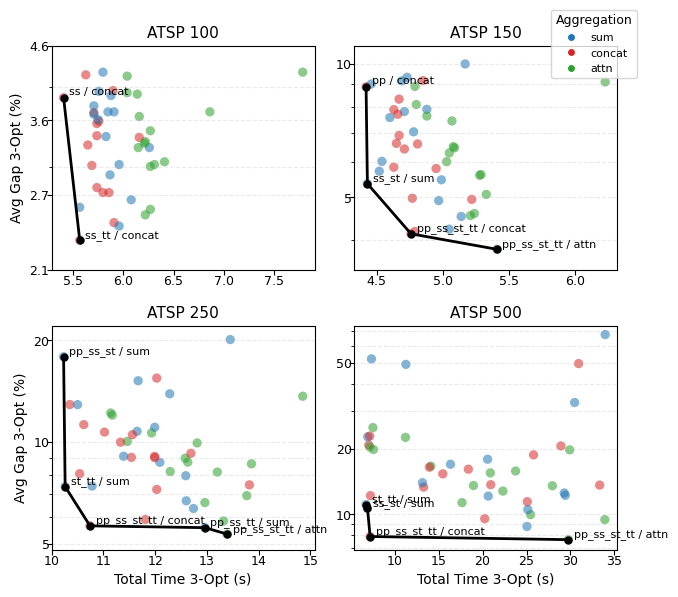

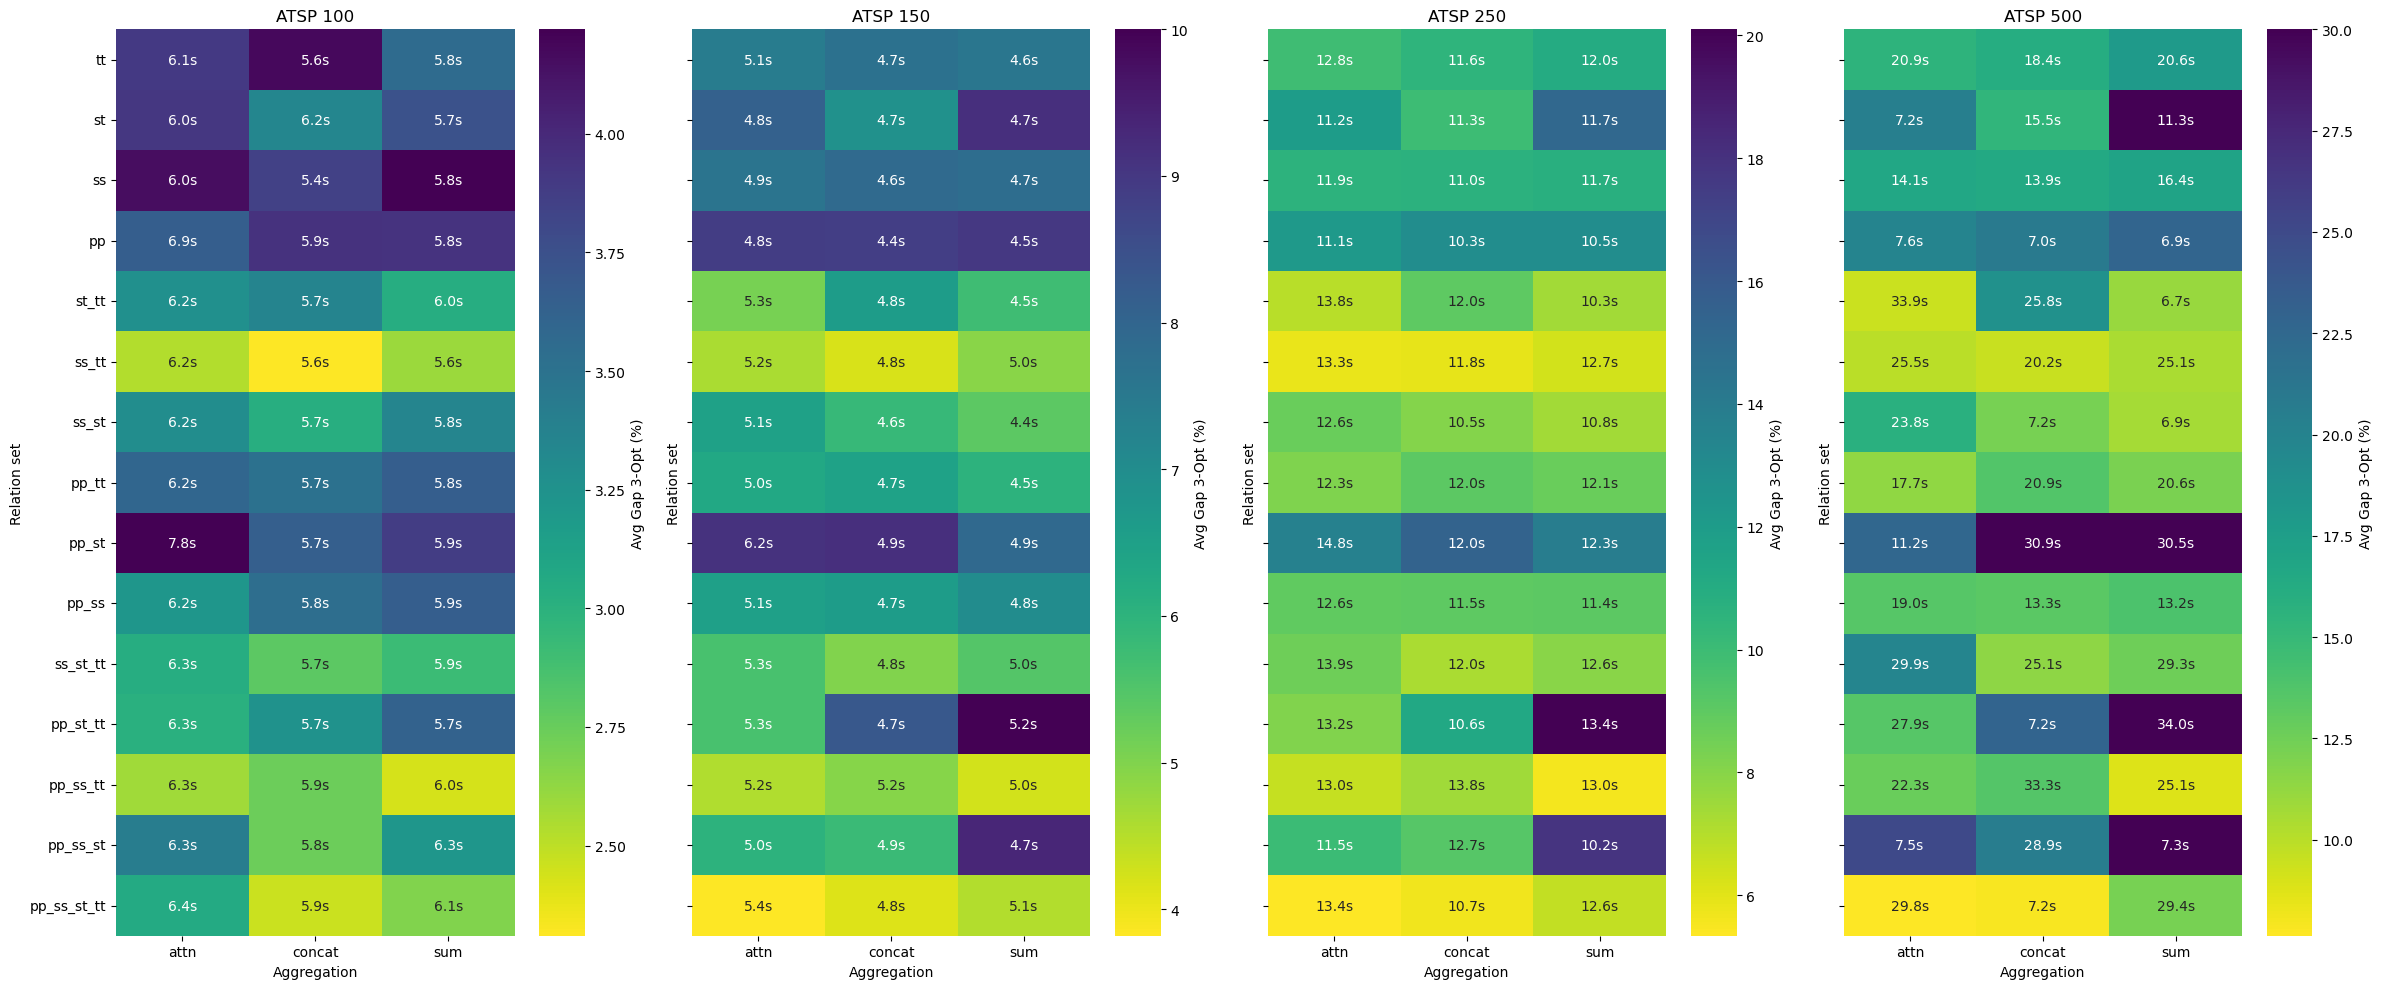

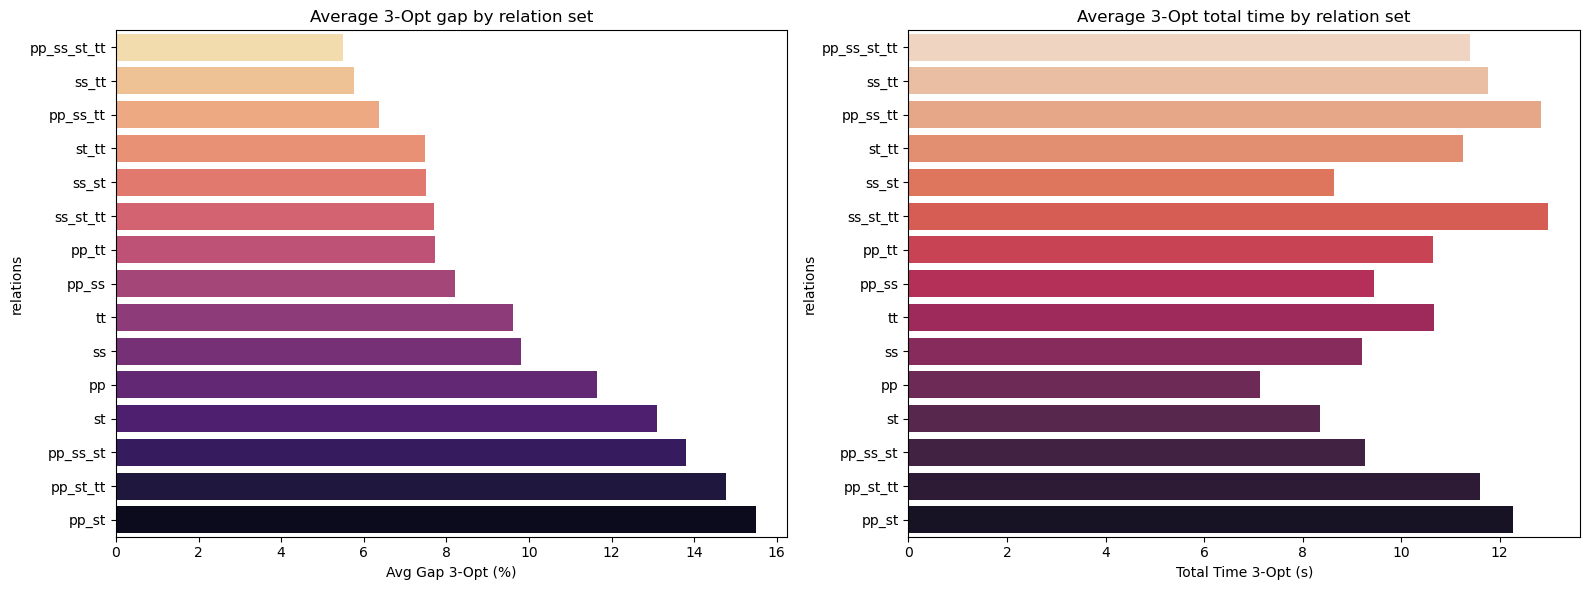

In [42]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter

time_col = "Total Time 3-Opt (s)"
gap_col  = "Avg Gap 3-Opt (%)"
sizes    = sorted(df["atsp_size"].unique())
assert len(sizes) == 4, "Expecting exactly 4 ATSP sizes for a 2x2 layout."

rows, cols = 2, 2
fig, axes = plt.subplots(rows, cols, figsize=(6.5, 6), sharex=False, sharey=False)
axes = axes.flatten()

agg_palette = {
    "sum": "#1f77b4",    # blue
    "concat": "#d62728", # red
    "attn": "#2ca02c",   # green
}
eps = 1e-6

def format_tick(value: float) -> str:
    if value >= 1:
        return f"{value:.1f}".rstrip("0").rstrip(".")
    if value >= 0.1:
        return f"{value:.2f}".rstrip("0").rstrip(".")
    return f"{value:.3f}".rstrip("0").rstrip(".")

for ax, size in zip(axes, sizes):
    subset = df[df["atsp_size"] == size].copy()
    subset["_plot_gap"] = subset[gap_col].clip(lower=eps)

    sns.scatterplot(
        data=subset,
        x=time_col,
        y="_plot_gap",
        hue="agg",
        palette=agg_palette,
        ax=ax,
        alpha=0.55,
        legend=False,
        s=45,
        edgecolor="none",
    )

    ranked = subset.sort_values(time_col).reset_index(drop=True)
    best_so_far = np.inf
    keep_idx = []
    for idx, row in ranked.iterrows():
        if row["_plot_gap"] <= best_so_far:
            best_so_far = row["_plot_gap"]
            keep_idx.append(idx)
    front = ranked.loc[keep_idx]

    ax.plot(front[time_col], front["_plot_gap"], color="k", lw=2, marker="o", markersize=5)
    for _, row in front.iterrows():
        ax.annotate(
            f"{row['relations']} / {row['agg']}",
            (row[time_col], row["_plot_gap"]),
            textcoords="offset points",
            xytext=(4, 2),
            fontsize=8,
        )

    min_gap = subset["_plot_gap"].min()
    max_gap = subset["_plot_gap"].max()
    lower = max(min_gap * 0.9, eps)
    upper = max_gap * 1.1

    ticks = []
    p_min = int(np.floor(np.log10(lower)))
    p_max = int(np.ceil(np.log10(upper)))
    for power in range(p_min, p_max + 1):
        for mantissa in (1, 2, 5):
            val = mantissa * 10**power
            if lower <= val <= upper:
                ticks.append(val)
    if not ticks:
        ticks = np.geomspace(lower, upper, num=4)

    ax.set_yscale("log")
    ax.set_ylim(lower, upper)
    ax.set_yticks(ticks)
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: format_tick(y)))
    ax.yaxis.set_minor_formatter(FuncFormatter(lambda *_: ""))
    ax.yaxis.get_offset_text().set_visible(False)
    ax.yaxis.grid(True, which="both", ls="--", alpha=0.25)
    ax.tick_params(axis="y", pad=-2, labelsize=9)
    ax.tick_params(axis="x", pad=0, labelsize=9)

    ax.set_title(f"ATSP {size}", fontsize=11)

    # left column gets the ylabel (font size 10)
    if size in (sizes[0], sizes[2]):
        ax.set_ylabel(gap_col, fontsize=10)
        ax.yaxis.labelpad = 4
    else:
        ax.set_ylabel("")

    # bottom row gets the xlabel (font size 10)
    if size in (sizes[2], sizes[3]):
        ax.set_xlabel(time_col, fontsize=10)
    else:
        ax.set_xlabel("")

legend_handles = [
    Line2D([0], [0], marker="o", color="w", label=agg,
           markerfacecolor=agg_palette[agg], markersize=6)
    for agg in ("sum", "concat", "attn")
]

fig.legend(
    handles=legend_handles,
    labels=["sum", "concat", "attn"],
    title="Aggregation",
    title_fontsize=9,
    fontsize=8,
    loc="upper right",
    bbox_to_anchor=(0.98, 0.98),
    borderaxespad=0,
)

plt.subplots_adjust(left=0.08, right=0.95, top=0.92, bottom=0.08, wspace=0.15, hspace=0.25)
fig.savefig("../../jobs/plots/pareto_summary.pdf", dpi=300, bbox_inches="tight")
# plt.show()

ncols = len(sizes)  # add this line

# --- Heatmaps ----------------------------------------------------------------
atom_order = {"pp": 0, "ss": 1, "st": 2, "tt": 3}

def relation_sort_key(rel: str):
    parts = rel.split("_")
    normalized = tuple(sorted(parts, key=lambda p: atom_order.get(p, len(atom_order))))
    return (-len(parts), normalized)

ncols = len(sizes)
fig, axes = plt.subplots(1, ncols, figsize=(6 * ncols, 10), sharey=True)
if ncols == 1:
    axes = [axes]

for ax, size in zip(axes, sizes):
    sub = df[df["atsp_size"] == size].copy()
    pivot_gap = sub.pivot(index="relations", columns="agg", values=gap_col)
    pivot_time = sub.pivot(index="relations", columns="agg", values=time_col)

    ordered_relations = sorted(pivot_gap.index, key=relation_sort_key)
    ordered_relations = list(reversed(ordered_relations))  # now singles → pairs → triples → all
    pivot_gap = pivot_gap.loc[ordered_relations]
    pivot_time = pivot_time.loc[ordered_relations]

    vmin = pivot_gap.min().min()
    vmax = min(pivot_gap.max().max(), 30.0)

    sns.heatmap(
        pivot_gap,
        ax=ax,
        cmap="viridis_r",
        vmin=vmin,
        vmax=vmax,
        annot=pivot_time.map(lambda t: f"{t:.1f}s"),
        fmt="",
        cbar_kws={"label": gap_col},
    )
    ax.set_title(f"ATSP {size}")
    ax.set_xlabel("Aggregation")
    ax.set_ylabel("Relation set")

plt.tight_layout()
plt.savefig("../../jobs/plots/heatmap.pdf", dpi=300, bbox_inches="tight")
# plt.show()
# --- Detail tables & relation contributions ----------------------------------
k = 3
top_k = (
    df.sort_values(["atsp_size", gap_col, time_col])
      .groupby("atsp_size", group_keys=False)
      .head(k)
      .reset_index(drop=True)
)

pretty_top = (
    top_k
    .rename(columns={
        "atsp_size": "ATSP",
        "relations": "rel",
        "agg": "agg",
        "iterations": "iter",
        "Avg Gap GNN (%)": "GNN gap (%)",
        "Avg Gap 2-Opt (%)": "2-Opt gap (%)",
        "Avg Gap 3-Opt (%)": "3-Opt gap (%)"
    })
    .assign(**{
        "3-Opt time (s)": top_k.apply(
            lambda r: f"{r['Total Time 3-Opt (s)']:.2f} ({r['Edge Builder + 3-Opt Time (s)']:.2f})",
            axis=1,
        ),
        "2-Opt time (s)": top_k.apply(
            lambda r: f"{r['Total Time 2-Opt (s)']:.2f} ({r['Edge Builder + 2-Opt Time (s)']:.2f})",
            axis=1,
        ),
    })
    .loc[:, [
        "ATSP", "rel", "agg", "iter",
        "GNN gap (%)", "2-Opt gap (%)", "3-Opt gap (%)",
        "3-Opt time (s)", "2-Opt time (s)",
    ]]
)

print(f"Top {k} configs per size (sorted by {gap_col} with time tie-breaker):")
display(pretty_top)

rel_summary = (
    df.groupby("relations")[[gap_col, time_col]]
      .mean()
      .sort_values(gap_col)
      .reset_index()
)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(
    data=rel_summary,
    x=gap_col,
    y="relations",
    hue="relations",
    palette="magma_r",
    ax=ax[0],
    dodge=False,
    legend=False,
)
ax[0].set_title("Average 3-Opt gap by relation set")
ax[0].set_xlabel(gap_col)
ax[0].set_ylabel("relations")

sns.barplot(
    data=rel_summary,
    x=time_col,
    y="relations",
    hue="relations",
    palette="rocket_r",
    ax=ax[1],
    dodge=False,
    legend=False,
)
ax[1].set_title("Average 3-Opt total time by relation set")
ax[1].set_xlabel(time_col)
ax[1].set_ylabel("relations")

plt.tight_layout()
plt.savefig("../../jobs/plots/barplot.pdf", dpi=300, bbox_inches="tight")


/tmp/ipykernel_3402462/2837098847.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_3402462/2837098847.py:17: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(
/tmp/ipykernel_3402462/2837098847.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_3402462/2837098847.py:35: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(


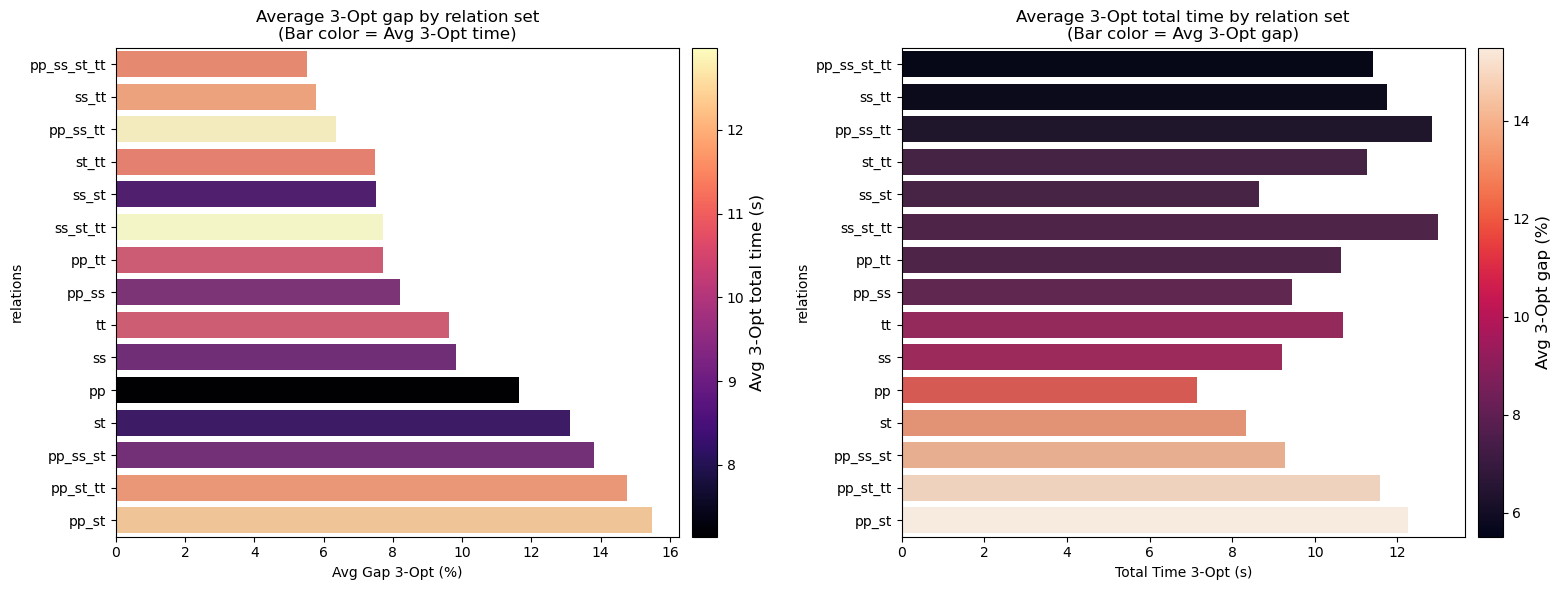

In [28]:
# --- Updated barplot: left colored by time, right colored by gap, both with colorbars ---
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Prepare normalization and colormaps
norm_time = plt.Normalize(rel_summary[time_col].min(), rel_summary[time_col].max())
norm_gap = plt.Normalize(rel_summary[gap_col].min(), rel_summary[gap_col].max())
cmap_time = sns.color_palette("magma", as_cmap=True)
cmap_gap = sns.color_palette("rocket", as_cmap=True)

bar_colors_time = cmap_time(norm_time(rel_summary[time_col]))
bar_colors_gap = cmap_gap(norm_gap(rel_summary[gap_col]))

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Left: gap by relation, colored by time
sns.barplot(
    data=rel_summary,
    x=gap_col,
    y="relations",
    palette=bar_colors_time,
    ax=ax[0],
    dodge=False,
    legend=False,
)
ax[0].set_title("Average 3-Opt gap by relation set\n(Bar color = Avg 3-Opt time)")
ax[0].set_xlabel(gap_col)
ax[0].set_ylabel("relations")
sm_time = plt.cm.ScalarMappable(cmap=cmap_time, norm=norm_time)
sm_time.set_array([])
cbar_time = fig.colorbar(sm_time, ax=ax[0], orientation="vertical", pad=0.02)
cbar_time.set_label("Avg 3-Opt total time (s)", fontsize=12)

# Right: time by relation, colored by gap
sns.barplot(
    data=rel_summary,
    x=time_col,
    y="relations",
    palette=bar_colors_gap,
    ax=ax[1],
    dodge=False,
    legend=False,
)
ax[1].set_title("Average 3-Opt total time by relation set\n(Bar color = Avg 3-Opt gap)")
ax[1].set_xlabel(time_col)
ax[1].set_ylabel("relations")
sm_gap = plt.cm.ScalarMappable(cmap=cmap_gap, norm=norm_gap)
sm_gap.set_array([])
cbar_gap = fig.colorbar(sm_gap, ax=ax[1], orientation="vertical", pad=0.02)
cbar_gap.set_label("Avg 3-Opt gap (%)", fontsize=12)

plt.tight_layout()
plt.savefig("../../jobs/plots/barplot.pdf", dpi=300, bbox_inches="tight")
plt.show()

/tmp/ipykernel_3402462/1149387042.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_3402462/1149387042.py:11: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(


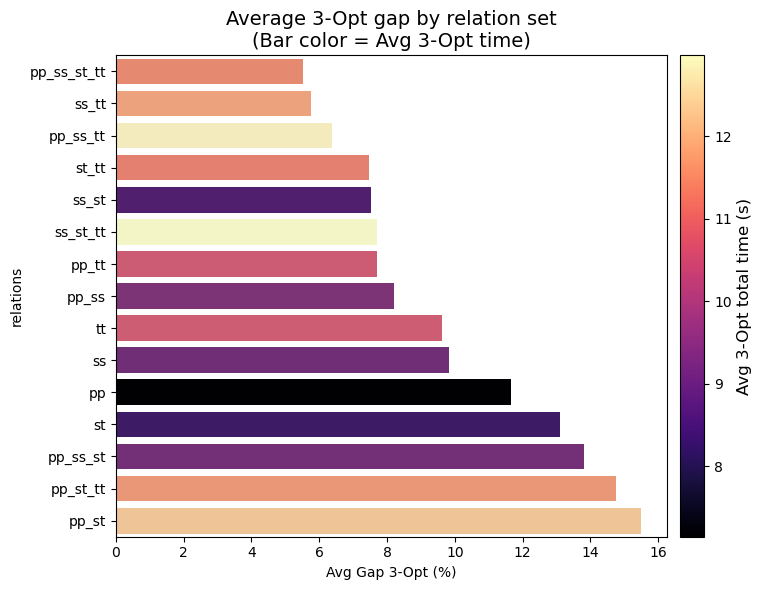

In [27]:
# Barplot: gap by relation, colored by time (heatmap style)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

norm = plt.Normalize(rel_summary[time_col].min(), rel_summary[time_col].max())
cmap = sns.color_palette("magma", as_cmap=True)
bar_colors = cmap(norm(rel_summary[time_col]))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.barplot(
    data=rel_summary,
    x=gap_col,
    y="relations",
    palette=bar_colors,
    ax=ax,
    dodge=False,
    legend=False,
)
ax.set_title("Average 3-Opt gap by relation set\n(Bar color = Avg 3-Opt time)", fontsize=14)
ax.set_xlabel(gap_col)
ax.set_ylabel("relations")

# Add colorbar for time
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", pad=0.02)
cbar.set_label("Avg 3-Opt total time (s)", fontsize=12)

plt.tight_layout()
plt.savefig("../../jobs/plots/barplot_heatmap.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# ATSP sizes
atsp_sizes = [100, 150, 250, 500, 1000]

# Data for each method (None for OOM or missing)
methods = [
    {
        "label": "MatNet",
        "gap": [1.84, 82.92, 181.68, None, None],
        "time": [3.24, 4.24, 8.48, None, None],
        "color": "#ff7f0e",
        "marker": "^",
        "linestyle": (0, (5, 2, 1, 2, 1, 2)),
    },
    {
        "label": "GLOP",
        "gap": [8.85, 17.91, 27.96, 38.96, 47.77],
        "time": [14.25, 13.99, 14.86, 17.06, 22.57],
        "color": "#2ca02c",
        "marker": "o",
        "linestyle": (0, (1, 2)),
    },
    {
        "label": "Het-GAT-Concat + E2",
        "gap": [9.39, 10.84, 13.49, 17.03, None],
        "time": [3.32, 4.44, 6.63, 15.05, None],
        "color": "#1f77b4",
        "marker": "x",
        "linestyle": (0, (5, 5)),
    },
    {
        "label": "Het-GAT-Concat + E3",
        "gap": [2.84, 4.88, 8.34, 7.89, None],
        "time": [2.35, 2.80, 0.75, 7.20, None],
        "color": "#d62728",
        "marker": "s",
        "linestyle": (0, (5, 2, 1, 2)),
    },
    {
        "label": "Het-GAT-Attn + E2",
        "gap": [10.86, 12.08, 14.29, 16.25, 58.94],
        "time": [3.23, 4.66, 8.26, 37.17, 95.50],
        "color": "#9467bd",
        "marker": "D",
        "linestyle": (0, (3, 1, 1, 1)),
    },
    {
        "label": "Het-GAT-Attn + E3",
        "gap": [3.45, 4.76, 8.50, 8.54, 53.14],
        "time": [2.52, 3.11, 2.48, 23.37, 52.73],
        "color": "#8c564b",
        "marker": "P",
        "linestyle": (0, (1, 1)),
    },
]

def update_label(label):
    return label.replace('E2', 'NN2R').replace('E3', 'EB3')

def get_min_max(values):
    vals = [v for v in values if v is not None]
    if not vals:
        return 1, 200
    min_v = min(vals)
    max_v = max(vals)
    min_v = max(min_v * 0.8, 1e-2)
    max_v = max(max_v * 1.2, min_v * 10)
    return min_v, max_v

# Gather all gap and time values for dynamic axis limits
all_gaps = []
all_times = []
for m in methods:
    all_gaps.extend([v for v in m["gap"] if v is not None])
    all_times.extend([v for v in m["time"] if v is not None])

gap_min, gap_max = get_min_max(all_gaps)
time_min, time_max = get_min_max(all_times)

fig, (ax_gap, ax_time) = plt.subplots(1, 2, figsize=(22, 10))

# Plot gap comparison (left)
for m in methods:
    ax_gap.plot(atsp_sizes, m["gap"], marker=m["marker"], markersize=20,
                markeredgewidth=2.5, markerfacecolor='none',
                linestyle=m["linestyle"], linewidth=4,
                color=m["color"], label=update_label(m["label"]))

# Plot execution time (right, only main lines)
for m in methods:
    ax_time.plot(atsp_sizes, m["time"], marker=m["marker"], markersize=20,
                 markeredgewidth=2.5, markerfacecolor='none',
                 linestyle=m["linestyle"], linewidth=4,
                 color=m["color"], label=update_label(m["label"]))

# Log scale and formatting
for ax, (ymin, ymax) in zip((ax_gap, ax_time), [(gap_min, gap_max), (time_min, time_max)]):
    ax.set_xlabel('ATSP Size', fontsize=22)
    ax.set_xticks(atsp_sizes)
    ax.tick_params(axis='both', labelsize=18)
    ax.grid(True, linewidth=1.5, which='both')
    ax.set_yscale('log')
    ax.set_ylim(ymin, ymax)

ax_gap.set_title('Average Gap Comparison (log scale)', fontsize=26, pad=25)
ax_gap.set_ylabel('Avg Gap (%)', fontsize=22)
ax_time.set_title('Execution Time Comparison (log scale)', fontsize=26, pad=25)
ax_time.set_ylabel('Time (s)', fontsize=22)

# Unified legend at bottom right of right plot
handles, labels = ax_time.get_legend_handles_labels()
ax_time.legend(handles, labels, loc='lower right', fontsize=20, framealpha=0.9, handlelength=3, handletextpad=1)

plt.tight_layout(pad=5.0)
plt.savefig('result_plot_full.pdf', bbox_inches='tight', dpi=300)
plt.close()

/tmp/ipykernel_3402462/51206222.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_3402462/51206222.py:7: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(


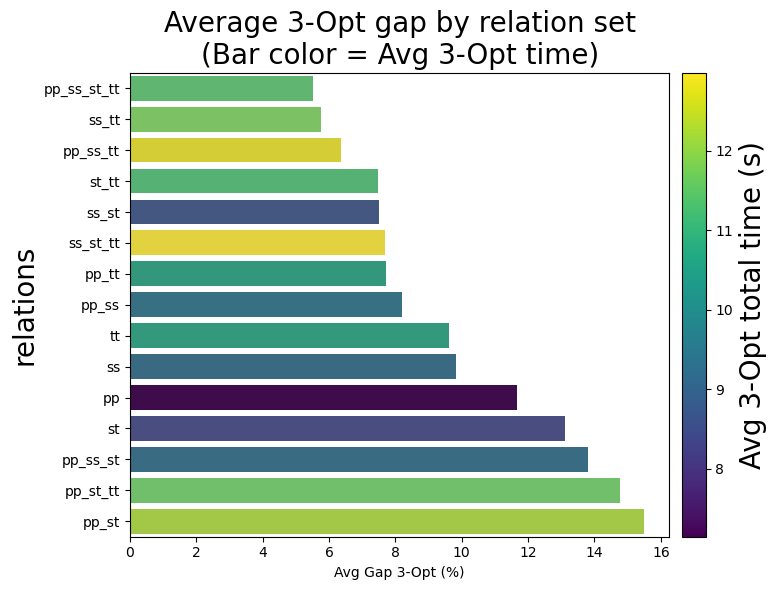

In [ ]:
norm = plt.Normalize(rel_summary[time_col].min(), rel_summary[time_col].max())
cmap = plt.get_cmap("viridis")
bar_colors = cmap(norm(rel_summary[time_col]))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

sns.barplot(
    data=rel_summary,
    x=gap_col,
    y="relations",
    palette=bar_colors,
    ax=ax,
    dodge=False,
    legend=False,
)

# ax.set_title("Average 3-Opt gap by relation set\n(Bar color = Avg 3-Opt time)", fontsize=20)
ax.set_xlabel(gap_col)
ax.set_ylabel("relations", fontsize=20)

# Add colorbar for time
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", pad=0.02)
cbar.set_label("Avg 3-Opt total time (s)", fontsize=20)

plt.tight_layout()
plt.savefig("../../jobs/plots/barplot_heatmap.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [58]:
import math

def estimate_flops_and_memory(n_nodes, hidden_dim, num_heads, num_layers,
                              relation_types=('pp','ss','st','tt'),
                              agg='sum', half_st=False, add_reverse=True):
    """
    Estimate FLOPs and memory usage for HetroGAT forward pass on HL(G).
    """
    n = n_nodes
    N = n * (n - 1)  # HL(G) nodes
    
    # edge counts before reverse edges
    m1 = n * (n - 1) * (n - 2) // 2
    m2 = n * (n - 1) // 2
    edges = {}
    if 'ss' in relation_types:
        edges['ss'] = m1
    if 'tt' in relation_types:
        edges['tt'] = m1
    if 'st' in relation_types:
        edges['st'] = m1 if half_st else 2 * m1
    if 'pp' in relation_types:
        edges['pp'] = m2
    
    sum_edges = sum(edges.values())
    if add_reverse:
        sum_edges *= 2  # account for reverse edges
    
    R = len(edges)
    F = hidden_dim
    
    # FLOPs
    msg_cost = N*F + sum_edges*F
    if agg == 'sum':
        fusion_cost = N*F**2
        fusion_mem = 0
    elif agg == 'concat':
        fusion_cost = R*N*F**2
        fusion_mem = N*R*F
    elif agg == 'attn':
        fusion_cost = N*R*F + N*F**2
        fusion_mem = N*R*F
    else:
        raise ValueError("agg must be 'sum','concat','attn'")
    
    per_layer_flops = msg_cost + fusion_cost
    total_flops = num_layers * per_layer_flops
    
    # Memory (approx, in bytes → MB)
    node_feat_mem = N * F * 4
    edge_mem = sum_edges * 2 * 4  # store (src,dst) as int32
    fusion_mem_bytes = fusion_mem * 4
    total_mem = node_feat_mem + edge_mem + fusion_mem_bytes
    
    return {
        'N': N,
        'edges_before_reverse': edges,
        'sum_edges_after_reverse': sum_edges,
        'per_layer_FLOPs': per_layer_flops,
        'total_FLOPs': total_flops,
        'node_feat_MB': node_feat_mem / (1024**2),
        'edge_MB': edge_mem / (1024**2),
        'fusion_MB': fusion_mem_bytes / (1024**2),
        'total_MB': total_mem / (1024**2),
    }


# Example usage
if __name__ == "__main__":
    res = estimate_flops_and_memory(
        n_nodes=1000,
        hidden_dim=128,
        num_heads=16,
        num_layers=4,
        relation_types=('pp','ss','st','tt'),
        agg='attn'
    )

    
    print("HL(G) nodes:", res['N'])
    print("Edges per type (before reverse):", res['edges_before_reverse'])
    print("Total edges (after reverse):", res['sum_edges_after_reverse'])
    print(f"FLOPs per layer: {res['per_layer_FLOPs']:.2e}")
    print(f"Total FLOPs: {res['total_FLOPs']:.2e}")
    print("Memory usage (MB):")
    print(f"  Node features: {res['node_feat_MB']:.2f} MB")
    print(f"  Edge indices: {res['edge_MB']:.2f} MB")
    print(f"  Fusion tensor: {res['fusion_MB']:.2f} MB")
    print(f"  Total approx: {res['total_MB']:.2f} MB")


HL(G) nodes: 999000
Edges per type (before reverse): {'ss': 498501000, 'tt': 498501000, 'st': 997002000, 'pp': 499500}
Total edges (after reverse): 3989007000
FLOPs per layer: 5.28e+11
Total FLOPs: 2.11e+12
Memory usage (MB):
  Node features: 487.79 MB
  Edge indices: 30433.71 MB
  Fusion tensor: 1951.17 MB
  Total approx: 32872.67 MB


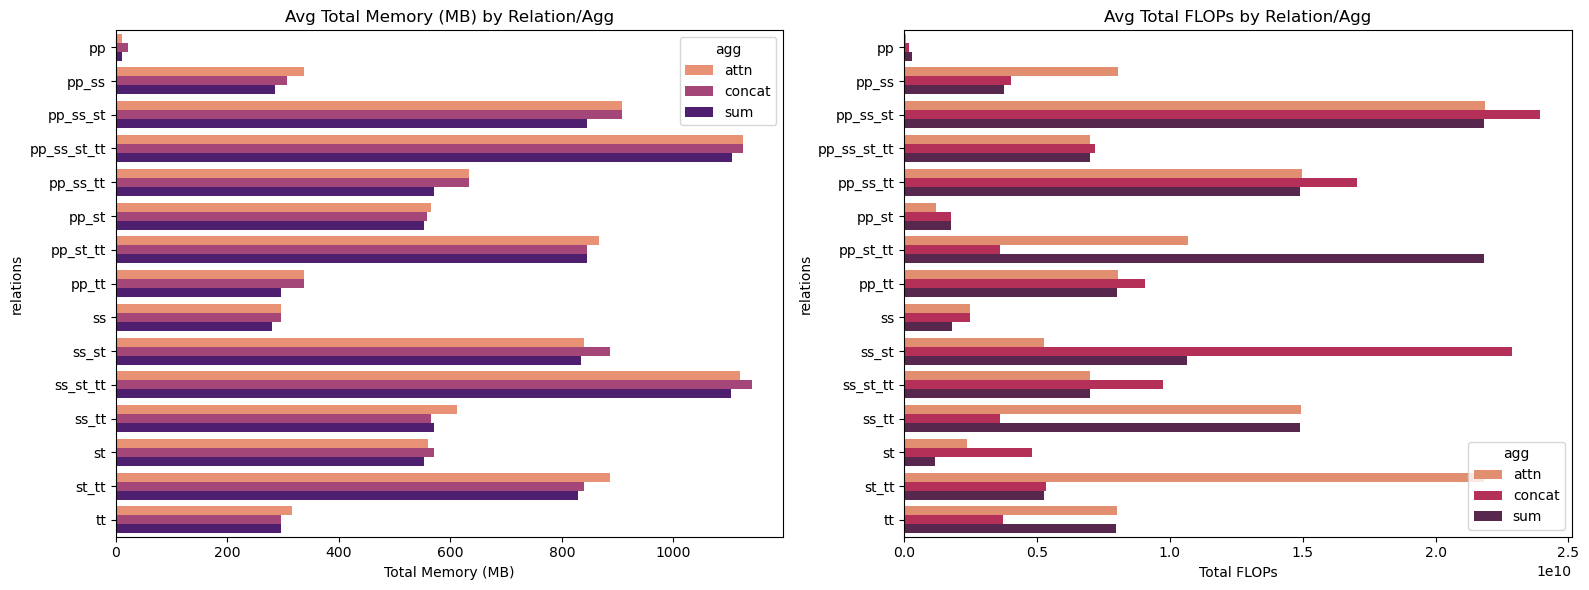

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Barplot: left = total memory (MB) by relation, right = total FLOPs by relation
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Prepare summary for plotting (group by relation, agg, take mean over atsp_size)
flops_summary = merged_df.groupby(['relations', 'agg'], as_index=False)[['total_memory_MB', 'total_FLOPs']].mean()

# Left: total memory (MB) by relation
sns.barplot(
    data=flops_summary,
    x='total_memory_MB',
    y='relations',
    hue='agg',
    palette='magma_r',
    ax=ax[0],
    dodge=True,
    legend=True,
)
ax[0].set_title("Avg Total Memory (MB) by Relation/Agg")
ax[0].set_xlabel("Total Memory (MB)")
ax[0].set_ylabel("relations")

# Right: total FLOPs by relation
sns.barplot(
    data=flops_summary,
    x='total_FLOPs',
    y='relations',
    hue='agg',
    palette='rocket_r',
    ax=ax[1],
    dodge=True,
    legend=True,
)
ax[1].set_title("Avg Total FLOPs by Relation/Agg")
ax[1].set_xlabel("Total FLOPs")
ax[1].set_ylabel("relations")

plt.tight_layout()
plt.savefig("../../jobs/plots/barplot_flops_mem.pdf", dpi=300, bbox_inches="tight")
plt.show()

/tmp/ipykernel_3402462/1503388654.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_3402462/1503388654.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


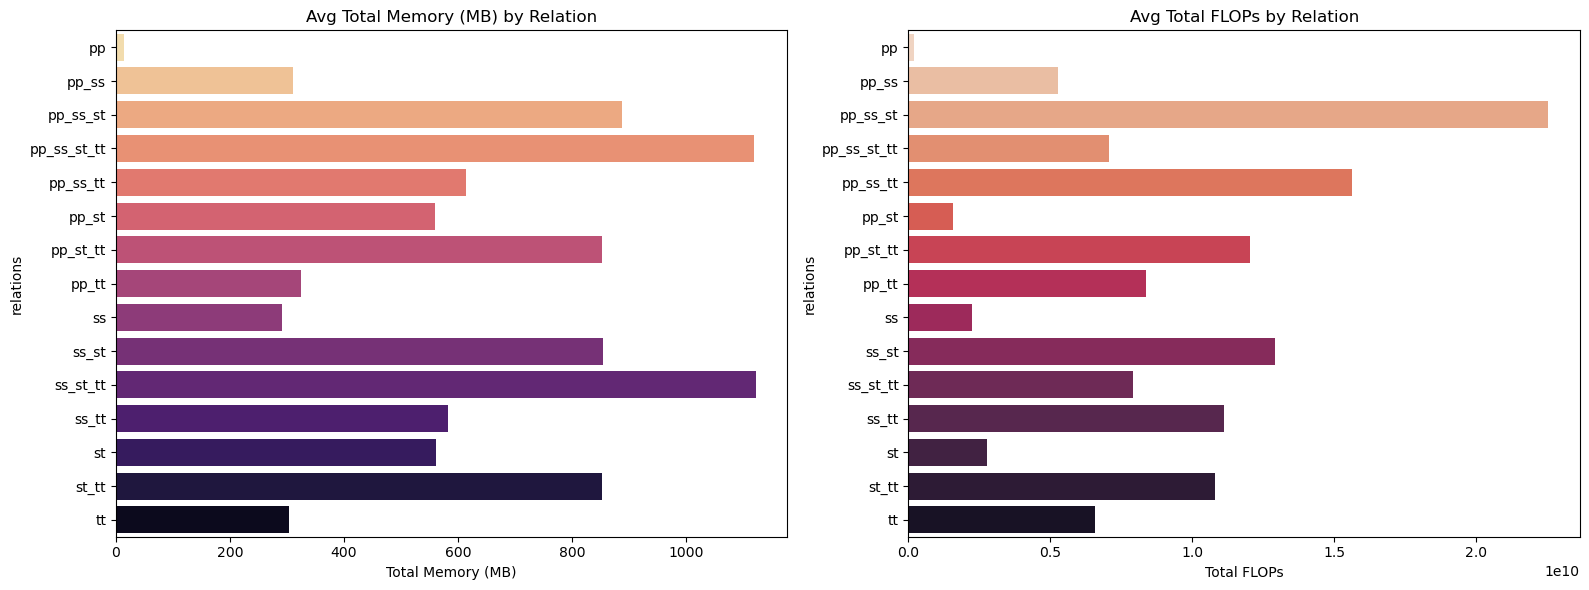

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Barplot: left = total memory (MB) by relation, right = total FLOPs by relation
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Prepare summary for plotting (group by relation only, average over agg and atsp_size)
flops_summary_rel = merged_df.groupby(['relations'], as_index=False)[['total_memory_MB', 'total_FLOPs']].mean()

# Left: total memory (MB) by relation (no hue)
sns.barplot(
    data=flops_summary_rel,
    x='total_memory_MB',
    y='relations',
    palette='magma_r',
    ax=ax[0],
    dodge=False,
    legend=False,
)
ax[0].set_title("Avg Total Memory (MB) by Relation")
ax[0].set_xlabel("Total Memory (MB)")
ax[0].set_ylabel("relations")

# Right: total FLOPs by relation (no hue)
sns.barplot(
    data=flops_summary_rel,
    x='total_FLOPs',
    y='relations',
    palette='rocket_r',
    ax=ax[1],
    dodge=False,
    legend=False,
)
ax[1].set_title("Avg Total FLOPs by Relation")
ax[1].set_xlabel("Total FLOPs")
ax[1].set_ylabel("relations")

plt.tight_layout()
plt.savefig("../../jobs/plots/barplot_flops_mem_avg.pdf", dpi=300, bbox_inches="tight")
plt.show()

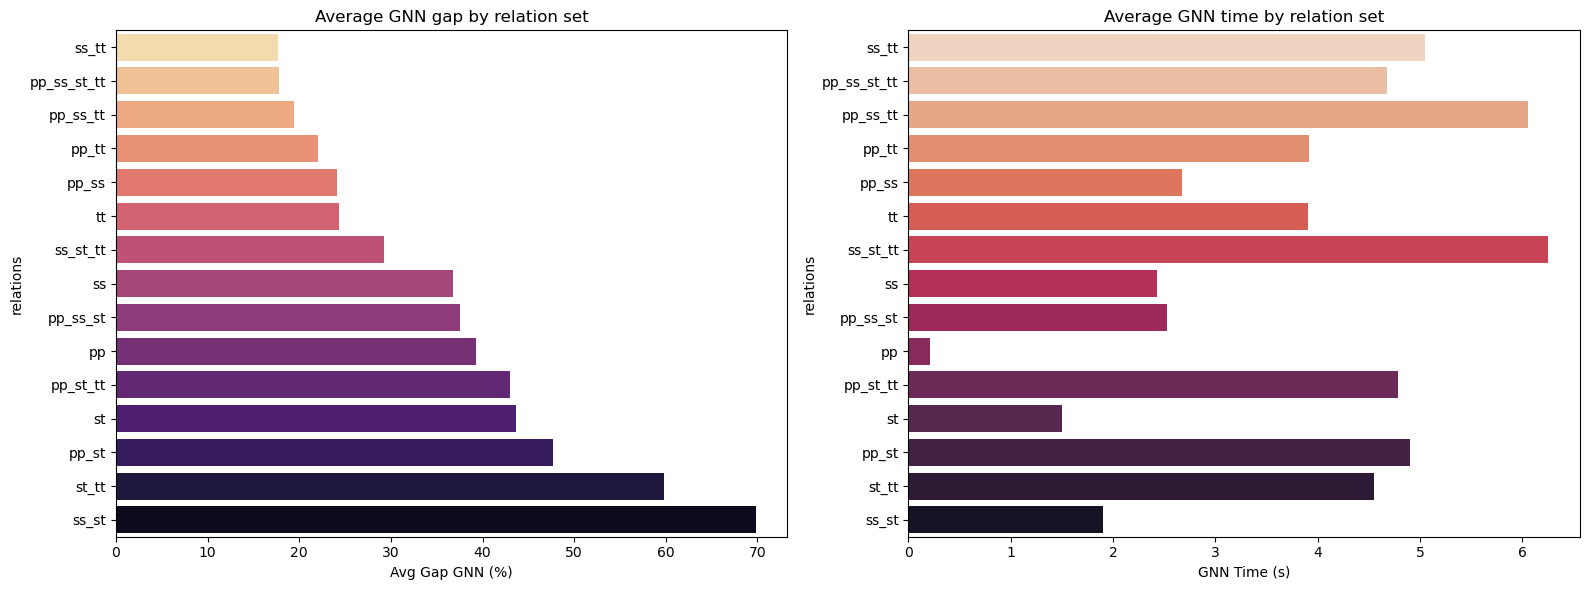

In [44]:
# Barplot: average GNN time and gap by relation set (not 3-Opt, only GNN)
import matplotlib.pyplot as plt
import seaborn as sns

gap_col_gnn = "Avg Gap GNN (%)"
time_col_gnn = "GNN Time (s)"

rel_summary_gnn = (
    df.groupby("relations")[[gap_col_gnn, time_col_gnn]]
      .mean()
      .sort_values(gap_col_gnn)
      .reset_index()
)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Left: gap by relation
sns.barplot(
    data=rel_summary_gnn,
    x=gap_col_gnn,
    y="relations",
    hue="relations",
    palette="magma_r",
    ax=ax[0],
    dodge=False,
    legend=False,
)
ax[0].set_title("Average GNN gap by relation set")
ax[0].set_xlabel(gap_col_gnn)
ax[0].set_ylabel("relations")

# Right: GNN time by relation
sns.barplot(
    data=rel_summary_gnn,
    x=time_col_gnn,
    y="relations",
    hue="relations",
    palette="rocket_r",
    ax=ax[1],
    dodge=False,
    legend=False,
)
ax[1].set_title("Average GNN time by relation set")
ax[1].set_xlabel(time_col_gnn)
ax[1].set_ylabel("relations")

plt.tight_layout()
plt.savefig("../../jobs/plots/barplot_gnn.pdf", dpi=300, bbox_inches="tight")
plt.show()

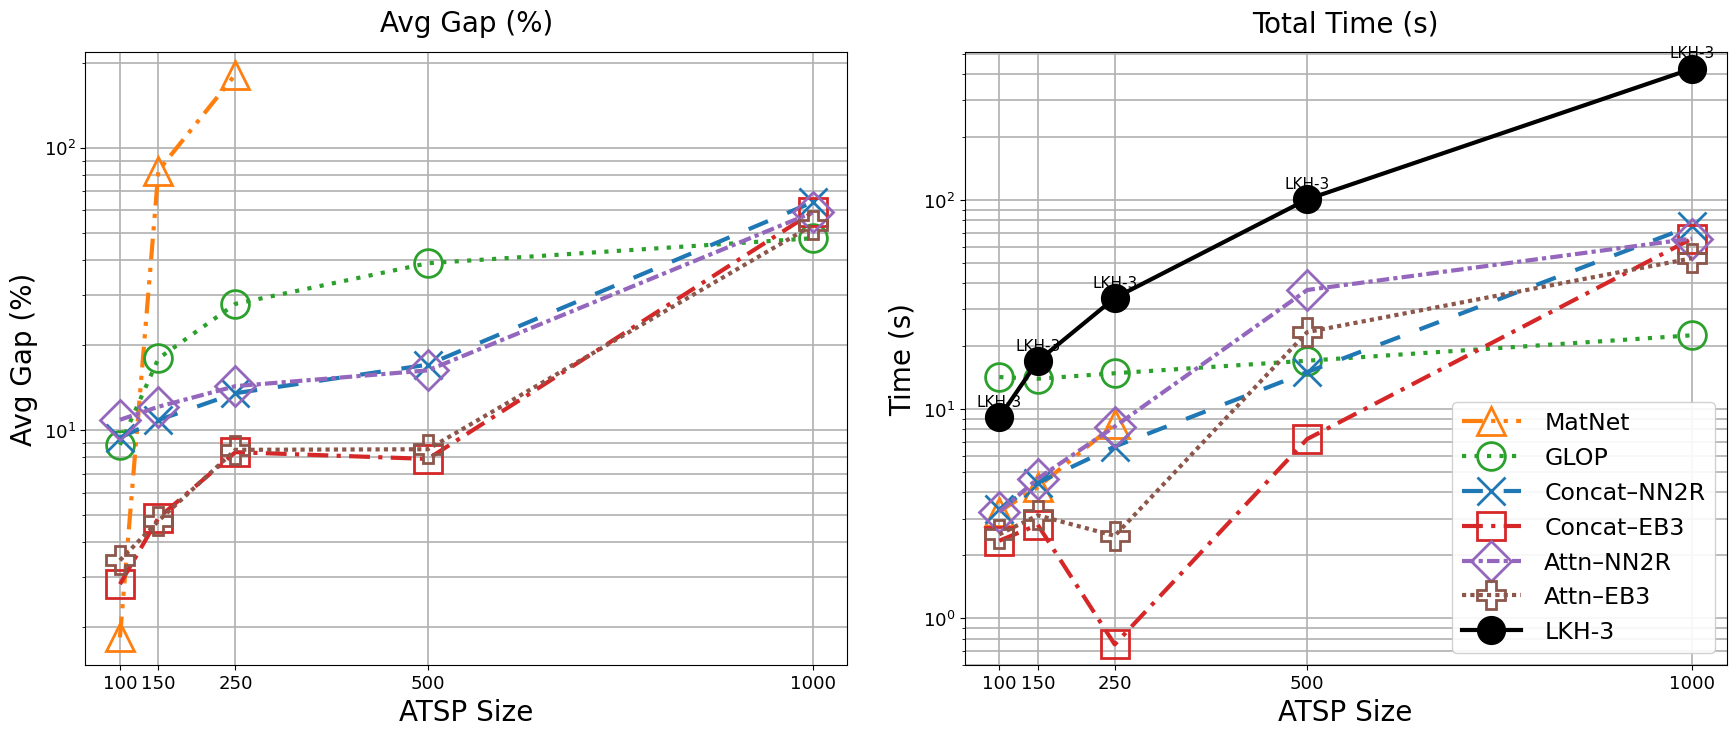

In [54]:
# Add LKH-3 time as black solid line with annotation
import matplotlib.pyplot as plt
import numpy as np

atsp_sizes = [100, 150, 250, 500, 1000]

methods = [
    {"label": "MatNet", "gap": [1.84, 82.92, 181.68, None, None], "time": [3.24, 4.24, 8.48, None, None], "color": "#ff7f0e", "marker": "^", "linestyle": (0, (5, 2, 1, 2, 1, 2))},
    {"label": "GLOP", "gap": [8.85, 17.91, 27.96, 38.96, 47.77], "time": [14.25, 13.99, 14.86, 17.06, 22.57], "color": "#2ca02c", "marker": "o", "linestyle": (0, (1, 2))},
    {"label": "Concat--NN2R", "gap": [9.39, 10.84, 13.49, 17.03, 64.10], "time": [3.32, 4.44, 6.63, 15.05, 75.41], "color": "#1f77b4", "marker": "x", "linestyle": (0, (5, 5))},
    {"label": "Concat--EB3", "gap": [2.84, 4.88, 8.34, 7.89, 59.03], "time": [2.35, 2.80, 0.75, 7.20, 65.45], "color": "#d62728", "marker": "s", "linestyle": (0, (5, 2, 1, 2))},
    {"label": "Attn--NN2R", "gap": [10.86, 12.08, 14.29, 16.25, 58.94], "time": [3.23, 4.66, 8.26, 37.17, 65.50], "color": "#9467bd", "marker": "D", "linestyle": (0, (3, 1, 1, 1))},
    {"label": "Attn--EB3", "gap": [3.45, 4.76, 8.50, 8.54, 53.14], "time": [2.52, 3.11, 2.48, 23.37, 52.73], "color": "#8c564b", "marker": "P", "linestyle": (0, (1, 1))},
]

# LKH-3 times from table
lkh3_times = [9.14, 16.98, 34.03, 100.81, 424.92]

# Helper for axis limits

def get_min_max(values):
    vals = [v for v in values if v is not None]
    if not vals:
        return 1, 200
    min_v = min(vals)
    max_v = max(vals)
    min_v = max(min_v * 0.8, 1e-2)
    max_v = max(max_v * 1.2, min_v * 10)
    return min_v, max_v

all_gaps = []
all_times = []
for m in methods:
    all_gaps.extend([v for v in m["gap"] if v is not None])
    all_times.extend([v for v in m["time"] if v is not None])
all_times.extend(lkh3_times)

gap_min, gap_max = get_min_max(all_gaps)
time_min, time_max = get_min_max(all_times)

fig, (ax_gap, ax_time) = plt.subplots(1, 2, figsize=(18, 8))

# Plot gap comparison (left)
for m in methods:
    ax_gap.plot(atsp_sizes, m["gap"], marker=m["marker"], markersize=20,
                markeredgewidth=2, markerfacecolor='none',
                linestyle=m["linestyle"], linewidth=3,
                color=m["color"], label=m["label"])

# Plot execution time (right)
for m in methods:
    ax_time.plot(atsp_sizes, m["time"], marker=m["marker"], markersize=20,
                 markeredgewidth=2, markerfacecolor='none',
                 linestyle=m["linestyle"], linewidth=3,
                 color=m["color"], label=m["label"])
# LKH-3 time as black solid line
ax_time.plot(atsp_sizes, lkh3_times, color='black', marker='o', markersize=20, linewidth=3, linestyle='-', label='LKH-3')
for x, y in zip(atsp_sizes, lkh3_times):
    ax_time.annotate('LKH-3', (x, y), textcoords="offset points", xytext=(0, 8), ha='center', fontsize=11, color='black')

# Log scale and formatting
for ax, (ymin, ymax) in zip((ax_gap, ax_time), [(gap_min, gap_max), (time_min, time_max)]):
    ax.set_xlabel('ATSP Size', fontsize=20)
    ax.set_xticks(atsp_sizes)
    ax.tick_params(axis='both', labelsize=13)
    ax.grid(True, linewidth=1.2, which='both')
    ax.set_yscale('log')
    ax.set_ylim(ymin, ymax)

ax_gap.set_title('Avg Gap (%)', fontsize=20, pad=15)
ax_gap.set_ylabel('Avg Gap (%)', fontsize=20)
ax_time.set_title('Total Time (s)', fontsize=20, pad=15)
ax_time.set_ylabel('Time (s)', fontsize=20)

# Shorter legend names
handles, labels = ax_time.get_legend_handles_labels()
short_labels = [l.replace('Het-GAT-', '').replace('Concat--', 'Concat–').replace('Attn--', 'Attn–') for l in labels]
ax_time.legend(handles, short_labels, loc='lower right', fontsize=17, framealpha=0.9, handlelength=2.5, handletextpad=1)

plt.tight_layout(pad=3.0)
plt.savefig('result_plot_full_compact_lkh3.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [57]:
import pickle
import networkx as nx

# Path to your pickle file
pkl_path = "/project/c_gnn_001/code/tsp/atsp_gnn/saved_dataset/tsp_variantes/HCP_50x30/1e656886a8d2466c9c51e73ab8b87327.pkl"

with open(pkl_path, "rb") as f:
    G = pickle.load(f)

print("Type:", type(G))
print("Nodes:", G.nodes())
print("Edges:", G.edges(data=True))
print("Graph attributes:", G.graph)
print(f"G: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges", flush=True)
print(G.is_directed(), flush=True)
# Example: get adjacency matrix as numpy array
import numpy as np
adj = nx.to_numpy_array(G, weight="weight")
print("Adjacency matrix shape:", adj.shape)
print("Adjacency matrix:", adj)

# If regrets are present as edge attributes
if any("regret" in d for _, _, d in G.edges(data=True)):
    regrets = np.zeros(adj.shape)
    for u, v, d in G.edges(data=True):
        regrets[u, v] = d.get("regret", 0.0)
    print("Regret matrix:", regrets)

Type: <class 'networkx.classes.digraph.DiGraph'>
Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Edges: [(0, 1, {'weight': 50000.0, 'in_solution': False}), (0, 2, {'weight': 50000.0, 'in_solution': False}), (0, 3, {'weight': 50000.0, 'in_solution': False}), (0, 4, {'weight': 50000.0, 'in_solution': False}), (0, 5, {'weight': 50000.0, 'in_solution': False}), (0, 6, {'weight': 50000.0, 'in_solution': False}), (0, 7, {'weight': 50000.0, 'in_solution': False}), (0, 8, {'weight': 50000.0, 'in_solution': False}), (0, 9, {'weight': 50000.0, 'in_solution': False}), (0, 10, {'weight': 50000.0, 'in_solution': False}), (0, 11, {'weight': 50000.0, 'in_solution': False}), (0, 12, {'weight': 50000.0, 'in_solution': False}), (0, 13, {'weight': 50000.0, 'in_solution': False}), (0, 14, {'weight': 50000.0, 'in_solution': False}), (0, 15, {'weight': 50000.0

Adjacency matrix shape: (50, 50)
Adjacency matrix: [[0.e+00 5.e+04 5.e+04 ... 5.e+04 5.e+04 5.e+04]
 [5.e+04 0.e+00 5.e+04 ... 5.e+04 5.e+04 5.e+04]
 [5.e+04 5.e+04 0.e+00 ... 5.e+04 5.e+04 5.e+04]
 ...
 [1.e+00 5.e+04 1.e+00 ... 0.e+00 1.e+00 5.e+04]
 [5.e+04 5.e+04 5.e+04 ... 5.e+04 0.e+00 5.e+04]
 [5.e+04 5.e+04 1.e+00 ... 5.e+04 5.e+04 0.e+00]]
